# SMICA effective beam and beam errors

Cosmetics first

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os.path as op
import cPickle
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'legend.labelspacing':0.01})

names = ['030', '044', '070', '100', '143', '217', '353', '545', '857']
colors = ['c', 'orange', 'purple', 'k', 'b', 'r', 'g', 'm', 'y']


def get_lmean(bintab):
    """ Return mean multipole values of flat bins. """
    return np.array([(b[0]+b[1])/2 for b in list(bintab)]) 

def get_bins(lmax=None):
    """ Return bins and mean values used for plotting"""
    bins = np.loadtxt("B.txt")
    lmean = get_lmean(bins)
    if lmax is not None:
        qmax = np.where(bins[:,1]>lmax)[0][0]
        bins = bins[:qmax,:]
        lmean = lmean[:qmax]
    return bins, lmean

def bin_cl (cl, bintab):
    """ Return binned power spectrum."""
    nbin = np.shape(bintab)[0]
    cq = np.zeros((nbin))
    for q in range(nbin):
        lmin,lmax = bintab[q,:]
        rg = np.arange(lmin,lmax+1).astype(np.int32)
        cq[q] = np.sum(cl[rg])/np.float(rg.size)
    return cq
    

def get_xticks(lmax=4000):
    """ Return xticks label ell -> sqrt(ell) """
    xarr = np.arange(10, int(np.sqrt(lmax+1)), 10)
    xlab = [str(j**2) for j in range(10, int(np.sqrt(lmax+1)), 10)]
    xarr = np.hstack((np.array([np.sqrt(5.),np.sqrt(25.)]), xarr))  
    xlab = ["5", "25"] + xlab
    return xarr, xlab

def format_legend(leg):
    """ Set fontsize and colors of legend"""
    for t in leg.get_texts():
        t.set_fontsize(14)    # the legend text fontsize
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)
    return leg   

In [48]:
def plotdiffdl(W, a_fit, a_star, sel_chan, lmax=1000, case="dx11d_2015"):
    """ Compute the effective beam per channel 
    and plot the its impact on the LCDM best fit TT spectrum. 
    """
    bins, lmean = get_bins(lmax=lmax)
    ELL = np.arange(lmax+1)
    CELL = np.loadtxt("BestFit2015.txt")[0:lmax+1]
    plt.figure()
    ax= plt.subplot(111)
    plt.title(case)
    for m in sel_chan:
        G = np.zeros((lmax+1))
        if np.isscalar(m):
            color = colors[m]
            sign = '+' if a_fit[m]/a_star[m]>=1 else "-"
            label = names[m]+" (%s"%sign+"{0:.2f}%)".format(100*np.abs(a_star[m]-a_fit[m])/a_fit[m])
            lstm = [m]
            ls = "-"
        else:
            color = "k"
            label = str([names[i] for i in m])
            ls = "--"
        
        a_tmp = a_fit.copy()
        a_tmp[m] = a_star[m]              
        G = np.array([np.sum(W[:,ell]*a_tmp) for ell in range(lmax+1)]) 
        fq = bin_cl(ELL*(ELL+1)*CELL*(G**2-1)/(2*np.pi), bins)
        plt.plot(np.sqrt(lmean), fq, label=label, color=color, lw=2, ls=ls)
    
    xarr, xlab = get_xticks(lmax=lmax)
    plt.xticks(xarr, xlab)
    leg= plt.legend(loc="lower right")
    leg = format_legend(leg)
    plt.subplots_adjust(left=0.125, right=0.9, top=0.9, bottom=0.1)
    plt.xlabel("$\ell$",fontsize=20)
    plt.ylabel(r"$D_\ell (G_\ell^2 -1) \left[ \mu \mathrm{K^{CMB^2}} \right]$",fontsize=20)
    


Then, we load the SMICA weights and mixing column for the CMB and make the plot


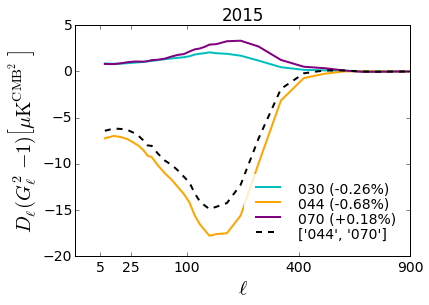

In [49]:
sel_chan = [0,1,2,np.array([1,2], dtype=int)] # impact of the 30, 44, 70 and 44+70 recalibration
W = np.loadtxt("filterdx11d_T_raw.txt") # from first archive
a_fit = np.loadtxt("A_old.txt")[:,0] # from first archive
a_star = np.loadtxt("A_new.txt")[:,0]*1e-3 # from second archive mKRJ -> KRJ
a_star[0:3] *= np.array([1.002578, 1.001428, 1.003456]) # LFI beam correction
plotdiffdl(W, a_fit, a_star, sel_chan, lmax=1000, case="2015")
plt.show()